# Execute the code below

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with lots of weather data

In [37]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

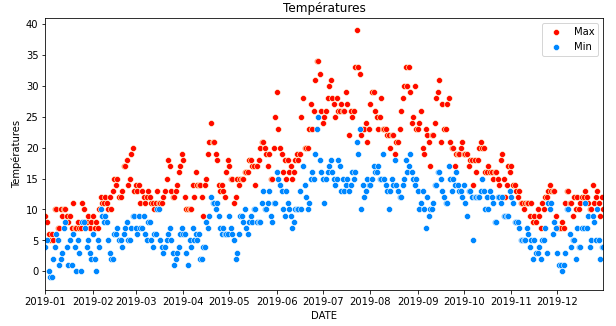


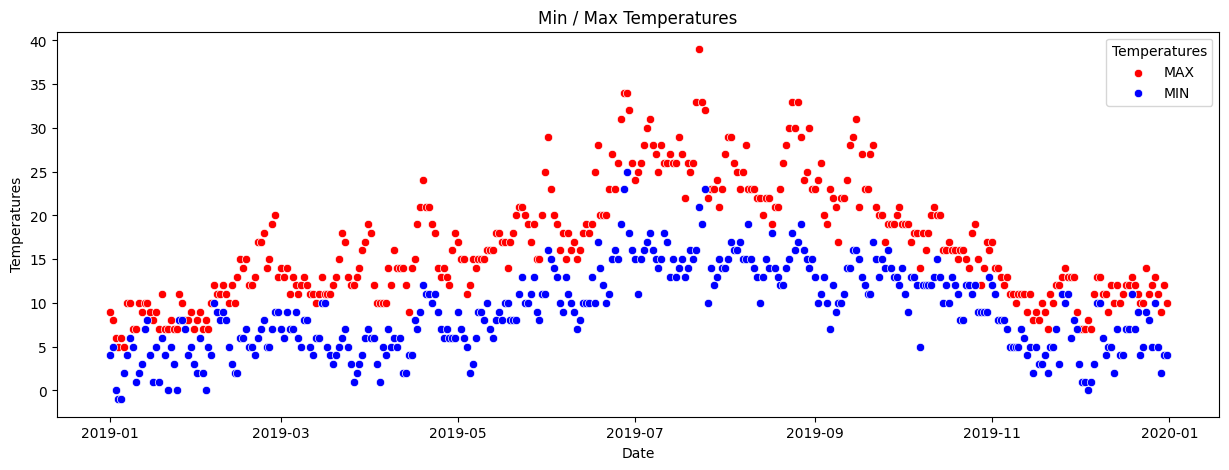

In [38]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

fig = plt.subplots(figsize = (15,5))

sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "MAX_TEMPERATURE_C",
                color = 'red')
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "MIN_TEMPERATURE_C",
                color = 'blue')
plt.title("Min / Max Temperatures")
plt.ylabel("Temperatures")
plt.xlabel("Date")
plt.legend(title = "Temperatures", labels = ["MAX", "MIN"], loc = "upper right")
plt.show()

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

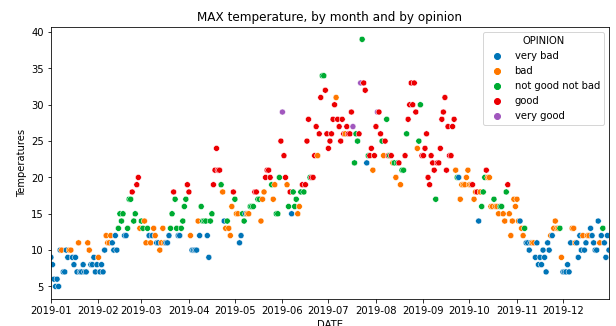

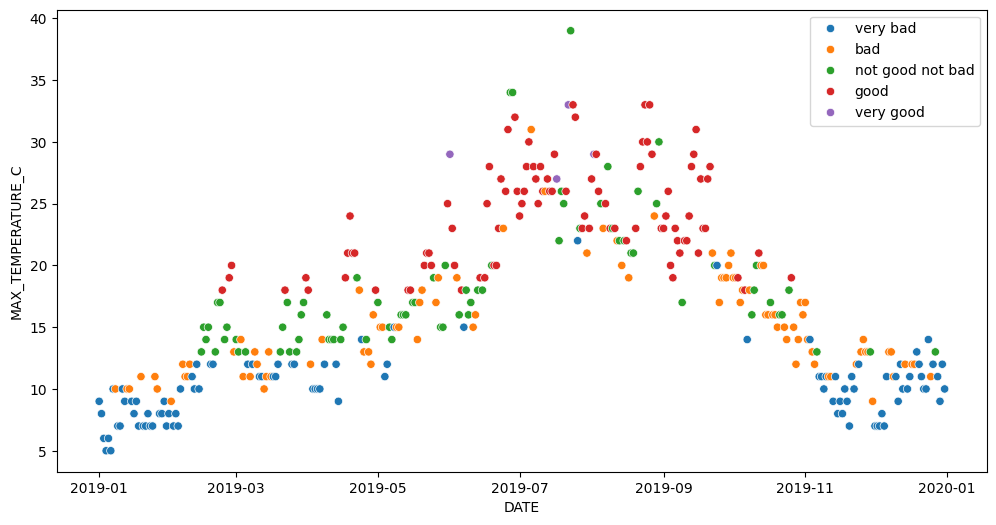

In [116]:
fig = plt.subplots(figsize = (12, 6))

sns.scatterplot(x="DATE", y="MAX_TEMPERATURE_C", hue = "OPINION", data=df_weather)

plt.legend()

## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

What does it mean ? it shows the correlations between each column into the dataset

Could you interpret this ? strong relations are close to 1 or -1 and colored in purple (for 1) and rose (for -1) while weak relations are close to 0 and leaved white

Why the diagonal value is 1 ? because it represents the correlation between a variable and itself

And why there is a blank column and a blank row ? blank column and blank row are representing the total_snow_mm in the dataset in which every value is 0.0

Could you find the less correlated columns ? the less related column is Max_temperature_c with day

Try to interpret it :
which columns are most correlated with MAX Temperature ? these are the columns with a temperature related parameter
Positively and negatively ?
positively : min temp, morning temp, noon temp, evening temp, heat index, windspeed max, dewpoint max
negatively :
Do you think it's logical ? visibility, month, day
it seems logical for month and day because there's no cause between the parameters, but it seems odd for visibility we could expect a stronger relation

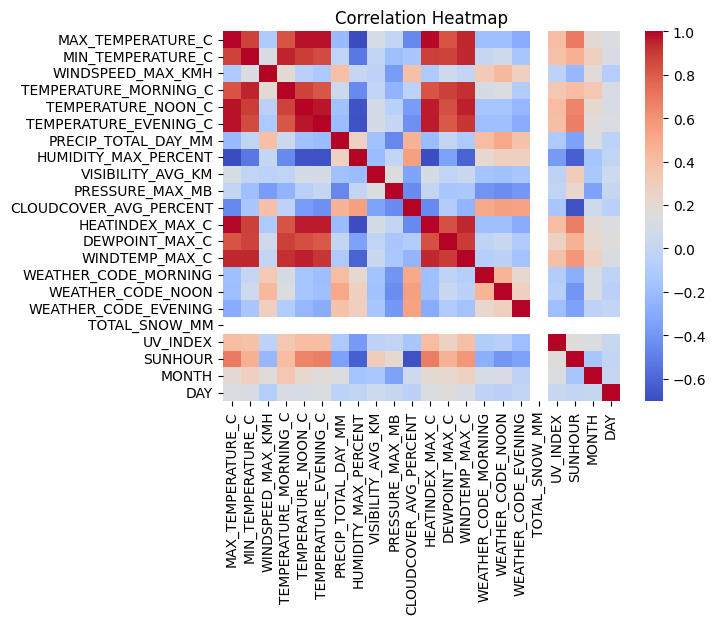

In [53]:
# It's your turn now :

sans_col = ["DATE", "OPINION"]
data = df_weather.loc[:, ~df_weather.columns.isin(sans_col)]
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()



## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

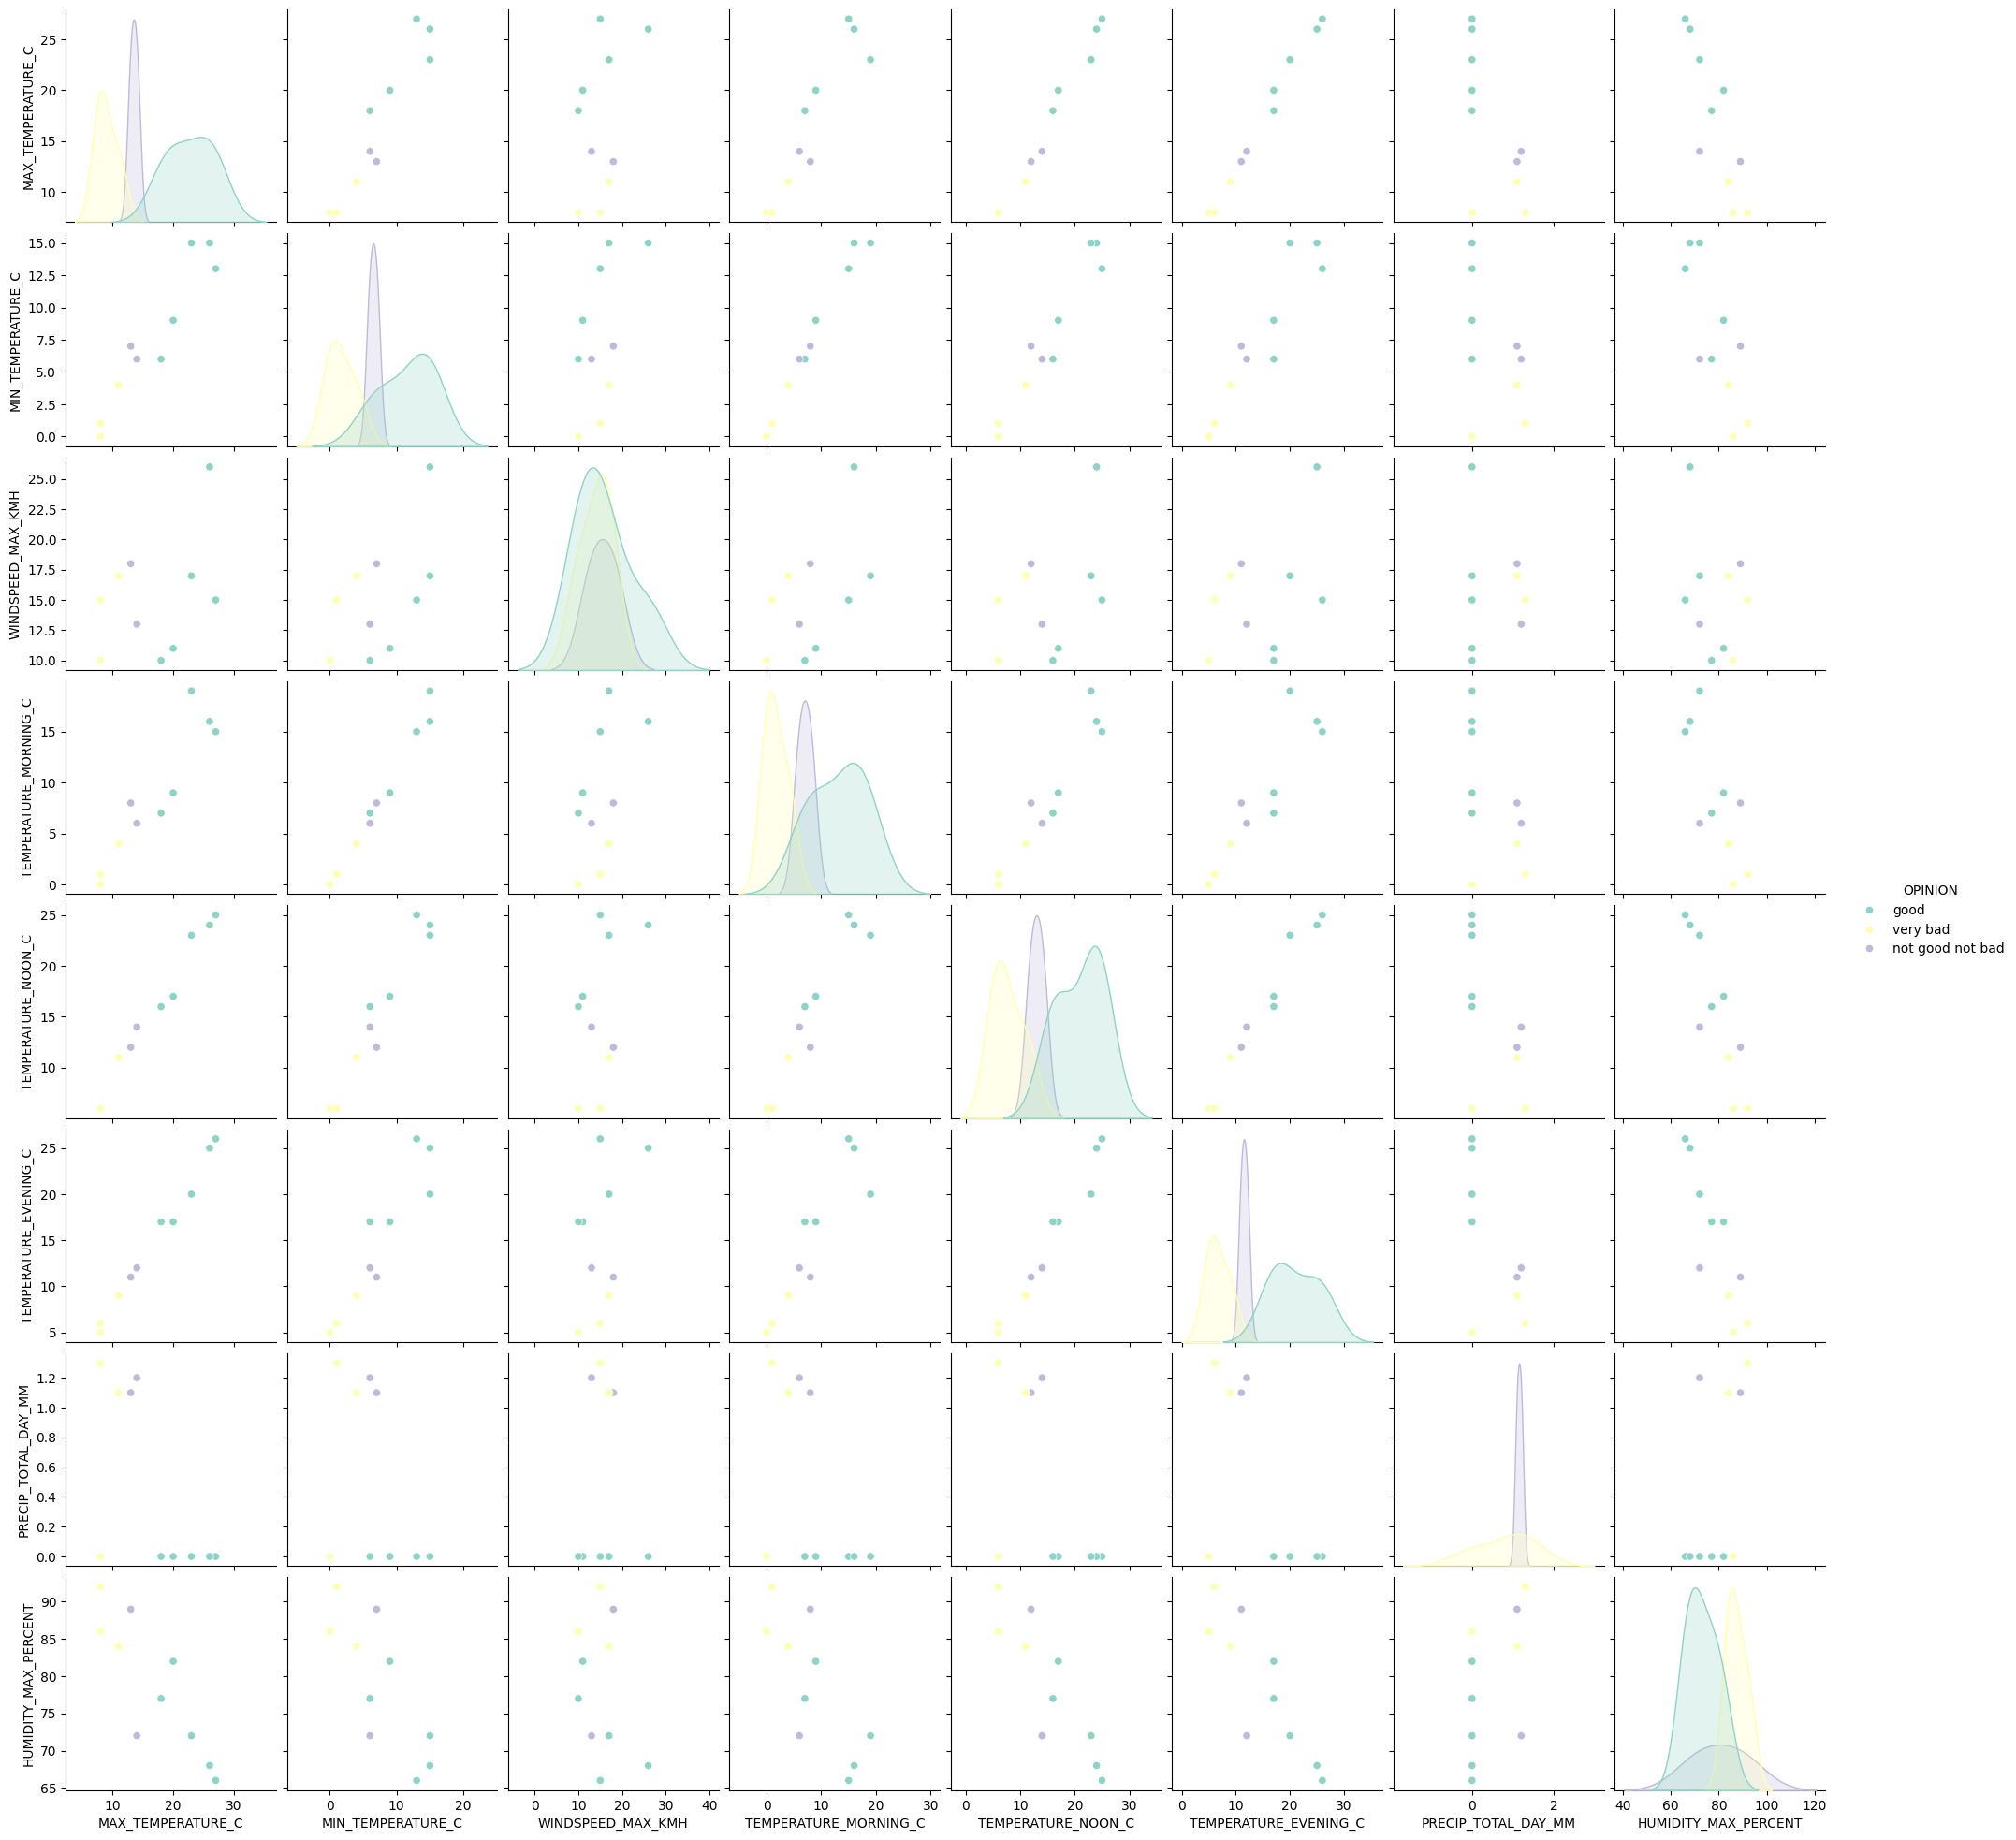

In [117]:
# It's your turn:
data = ['OPINION'] + list(df_weather.drop('OPINION', axis=1).columns[:9])

sampled_data = df_weather[data].sample(n=10, random_state=42)

sns.pairplot(sampled_data, hue="OPINION", palette="Set3")
plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

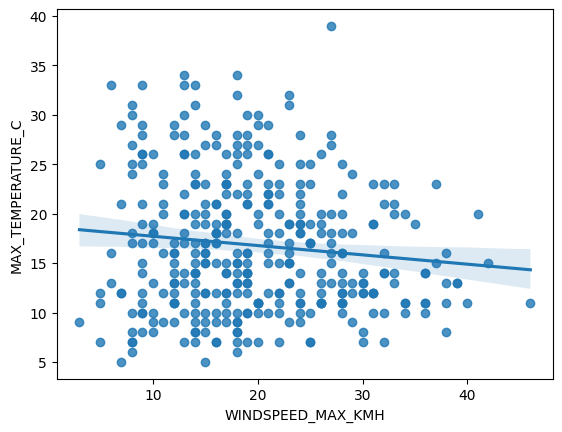

In [70]:
sns.regplot(x = 'WINDSPEED_MAX_KMH', y = 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


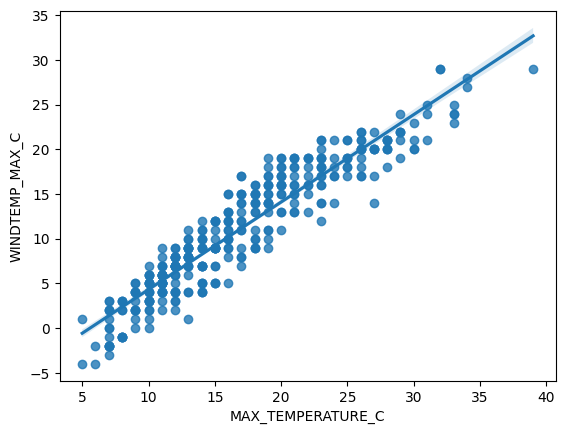

In [71]:
# Display a regplot with a positive correlation:
sns.regplot(x='MAX_TEMPERATURE_C', y='WINDTEMP_MAX_C', data=df_weather)
plt.show()


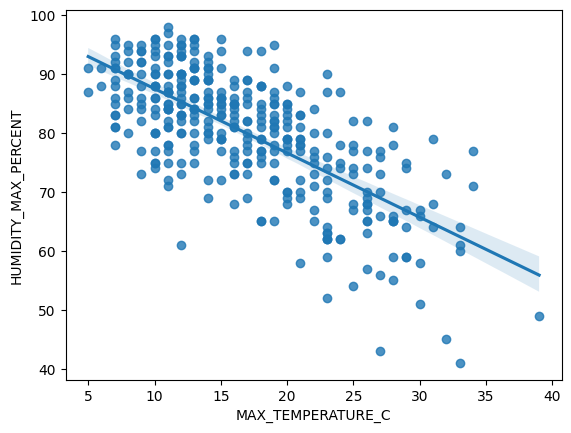

In [72]:
# Display a regplot with a negative correlation:
sns.regplot(x='MAX_TEMPERATURE_C', y='HUMIDITY_MAX_PERCENT', data=df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice on the same dashboard. You're an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn's charts.

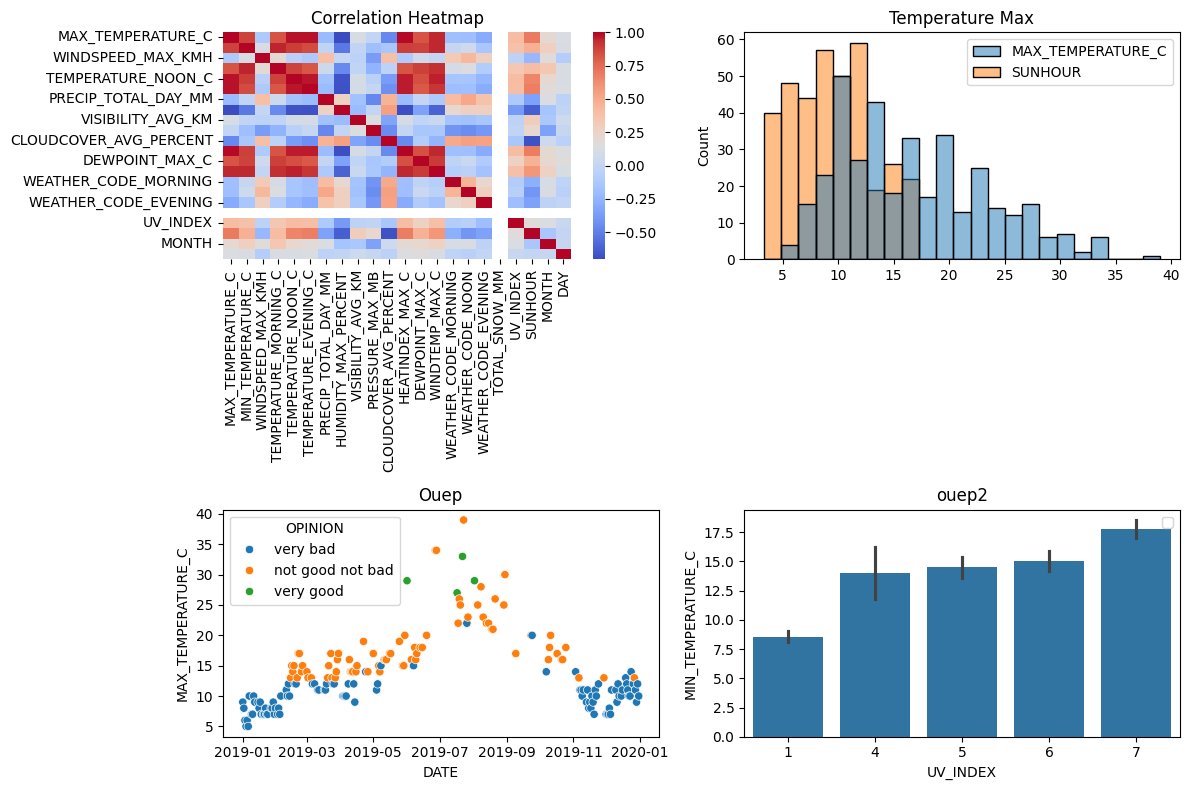

In [131]:
# Your code here
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Chart 1: Heatmap of correlations
sans_col = ["DATE", "OPINION"]
data = df_weather.loc[:, ~df_weather.columns.isin(sans_col)]
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap')

# Chart 2: Distribution of a numerical variable
sns.histplot(data=df_weather[["MAX_TEMPERATURE_C","SUNHOUR"]], ax=axes[0, 1])
axes[0, 1].set_title("Temperature Max")

# Chart 3: Scatter plot with color-coding by a categorical variable
desired_categories = ["very good", "not good not bad", "very bad"]
filtered_df = df_weather[df_weather['OPINION'].isin(desired_categories)]
sns.scatterplot(x="DATE", y="MAX_TEMPERATURE_C", hue = "OPINION", data=filtered_df, ax=axes[1, 0])
axes[1, 0].set_title("Ouep")
plt.legend(fontsize = 10)

#Chart 4: Bar chart
sns.barplot(x="UV_INDEX", y="MIN_TEMPERATURE_C", data=df_weather, ax=axes[1, 1])
axes[1, 1].set_title("ouep2")

plt.tight_layout()

plt.show()





# Is it summer? It seems appropriate. :)